<a href="https://colab.research.google.com/github/jscriven0218/DS-Live-022122/blob/main/HOLD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler
import seaborn as sns

In [ ]:
vaccines = pd.read_csv('H1N1_Flu_Vaccines.csv')
vaccines.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
# concentrating on H1N1 vacccinations, we removed all columns concentrating on seasonal flu vaccines
flu_info = ['seasonal_vaccine', 'doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
vaccines = vaccines.drop(flu_info, axis=1)
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [ ]:
vaccines.isnull().sum()

,0
respondent_id,0
h1n1_concern,92
h1n1_knowledge,116
behavioral_antiviral_meds,71
behavioral_avoidance,208
behavioral_face_mask,19
behavioral_wash_hands,42
behavioral_large_gatherings,87
behavioral_outside_home,82
behavioral_touch_face,128


In [ ]:
vaccines['opinion_h1n1_vacc_effective'].fillna(vaccines['opinion_h1n1_vacc_effective'].median(), inplace=True)
vaccines['opinion_h1n1_risk'].fillna(vaccines['opinion_h1n1_risk'].median(), inplace=True)
vaccines['opinion_h1n1_sick_from_vacc'].fillna(vaccines['opinion_h1n1_sick_from_vacc'].median(), inplace=True)

<ipython-input-174-c55da8e2d4fd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vaccines['opinion_h1n1_vacc_effective'].fillna(vaccines['opinion_h1n1_vacc_effective'].median(), inplace=True)
<ipython-input-174-c55da8e2d4fd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [ ]:
print('1 = Not at all effective; 2 = Not very effective; 3 = Dont know; 4 = Somewhat effective; 5 = Very effective.')
print(vaccines['opinion_h1n1_vacc_effective'].value_counts().sort_index())
print('1 = Very Low; 2 = Somewhat low; 3 = Dont know; 4 = Somewhat high; 5 = Very high.')
print(vaccines['opinion_h1n1_risk'].value_counts().sort_index())
print('1 = Not at all worried; 2 = Not very worried; 3 = Dont know; 4 = Somewhat worried; 5 = Very worried.')
print(vaccines['opinion_h1n1_sick_from_vacc'].value_counts().sort_index())

1 = Not at all effective; 2 = Not very effective; 3 = Dont know; 4 = Somewhat effective; 5 = Very effective.
opinion_h1n1_vacc_effective
1.0      886
2.0     1858
3.0     4723
4.0    12074
5.0     7166
Name: count, dtype: int64
1 = Very Low; 2 = Somewhat low; 3 = Dont know; 4 = Somewhat high; 5 = Very high.
opinion_h1n1_risk
1.0     8139
2.0    10307
3.0     1117
4.0     5394
5.0     1750
Name: count, dtype: int64
1 = Not at all worried; 2 = Not very worried; 3 = Dont know; 4 = Somewhat worried; 5 = Very worried.
opinion_h1n1_sick_from_vacc
1.0    8998
2.0    9524
3.0     148
4.0    5850
5.0    2187
Name: count, dtype: int64


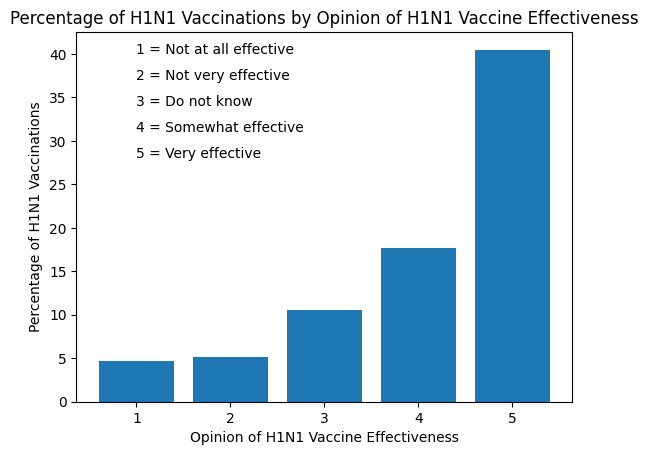

In [ ]:
effective_percentages = vaccines.groupby('opinion_h1n1_vacc_effective')['h1n1_vaccine'].mean() * 100
plt.bar(effective_percentages.index, effective_percentages.values)
plt.xlabel('Opinion of H1N1 Vaccine Effectiveness')
plt.xlabel('Opinion of H1N1 Vaccine Effectiveness')
plt.ylabel('Percentage of H1N1 Vaccinations')
plt.title('Percentage of H1N1 Vaccinations by Opinion of H1N1 Vaccine Effectiveness')
plt.text(1,40, '1 = Not at all effective', fontsize=10)
plt.text(1,37, '2 = Not very effective', fontsize=10)
plt.text(1,34, '3 = Do not know', fontsize=10)
plt.text(1,31, '4 = Somewhat effective', fontsize=10)
plt.text(1,28, '5 = Very effective', fontsize=10)
plt.show()


In [ ]:
results = sm.OLS(vaccines['h1n1_vaccine'], vaccines['opinion_h1n1_vacc_effective']).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           h1n1_vaccine   R-squared (uncentered):                   0.256
Model:                            OLS   Adj. R-squared (uncentered):              0.256
Method:                 Least Squares   F-statistic:                              9179.
Date:                Thu, 05 Jun 2025   Prob (F-statistic):                        0.00
Time:                        11:31:43   Log-Likelihood:                         -13266.
No. Observations:               26707   AIC:                                  2.653e+04
Df Residuals:                   26706   BIC:                                  2.654e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
opinion_h1n1_vacc_effective     0.0586      0.001     95.807      0.000       0.057       0.060
==============================================================================
Omnibus:                     4870.705   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8176.948
Skew:                           1.355   Prob(JB):                         0.00
Kurtosis:                       2.946   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# vaccines_effect = vaccines[vaccines['opinion_h1n1_vacc_effective']>3]
vaccines_circum = vaccines[['h1n1_vaccine','age_group','education','income_poverty','sex','race']]
vaccines_behavior = vaccines[['h1n1_vaccine','behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face']]

In [ ]:
imputer_frequent = SimpleImputer(strategy='most_frequent')
vaccines_circum = pd.DataFrame(imputer_frequent.fit_transform(vaccines_circum), columns=vaccines_circum.columns)
vaccines_circum['h1n1_vaccine'] = vaccines_circum['h1n1_vaccine'].astype(int)

imputer_median = SimpleImputer(strategy='median')
vaccines_behavior = pd.DataFrame(imputer_median.fit_transform(vaccines_behavior), columns=vaccines_behavior.columns)
vaccines_behavior['h1n1_vaccine'] = vaccines_behavior['h1n1_vaccine'].astype(int)

In [ ]:
vaccines_circum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   h1n1_vaccine    26707 non-null  int64 
 1   age_group       26707 non-null  object
 2   education       26707 non-null  object
 3   income_poverty  26707 non-null  object
 4   sex             26707 non-null  object
 5   race            26707 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [ ]:
vaccines_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 26707 non-null  int64  
 1   behavioral_antiviral_meds    26707 non-null  float64
 2   behavioral_avoidance         26707 non-null  float64
 3   behavioral_face_mask         26707 non-null  float64
 4   behavioral_wash_hands        26707 non-null  float64
 5   behavioral_large_gatherings  26707 non-null  float64
 6   behavioral_outside_home      26707 non-null  float64
 7   behavioral_touch_face        26707 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.6 MB


In [ ]:
vaccines_circum.head()

,h1n1_vaccine,age_group,education,income_poverty,sex,race
0,0,55 - 64 Years,< 12 Years,Below Poverty,Female,White
1,0,35 - 44 Years,12 Years,Below Poverty,Male,White
2,0,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",Male,White
3,0,65+ Years,12 Years,Below Poverty,Female,White
4,0,45 - 54 Years,Some College,"<= $75,000, Above Poverty",Female,White


In [ ]:
#age_map = {'18 - 34 Years': 'YoungGroup', '35 - 44 Years': 'YoungGroup', '45 - 54 Years': 'YoungGroup', '55 - 64 Years': 'OlderGroup', '65+ Years': 'OlderGroup'}
education_map = {'< 12 Years': 'LowEducation', '12 Years': 'LowEducation', 'Some College': 'MediumEducation', 'College Graduate': 'HighEducation'}
income_map = {'Below Poverty': 'LowIncome', '<= $75,000, Above Poverty': 'MediumIncome', '> $75,000': 'HighIncome'}
#vaccines_effect['age_group'] = vaccines_effect['age_group'].map(age_map)
vaccines_circum['education'] = vaccines_circum['education'].map(education_map)
vaccines_circum['income_poverty'] = vaccines_circum['income_poverty'].map(income_map)
vaccines_circum.head()


,h1n1_vaccine,age_group,education,income_poverty,sex,race
0,0,55 - 64 Years,LowEducation,LowIncome,Female,White
1,0,35 - 44 Years,LowEducation,LowIncome,Male,White
2,0,18 - 34 Years,HighEducation,MediumIncome,Male,White
3,0,65+ Years,LowEducation,LowIncome,Female,White
4,0,45 - 54 Years,MediumEducation,MediumIncome,Female,White


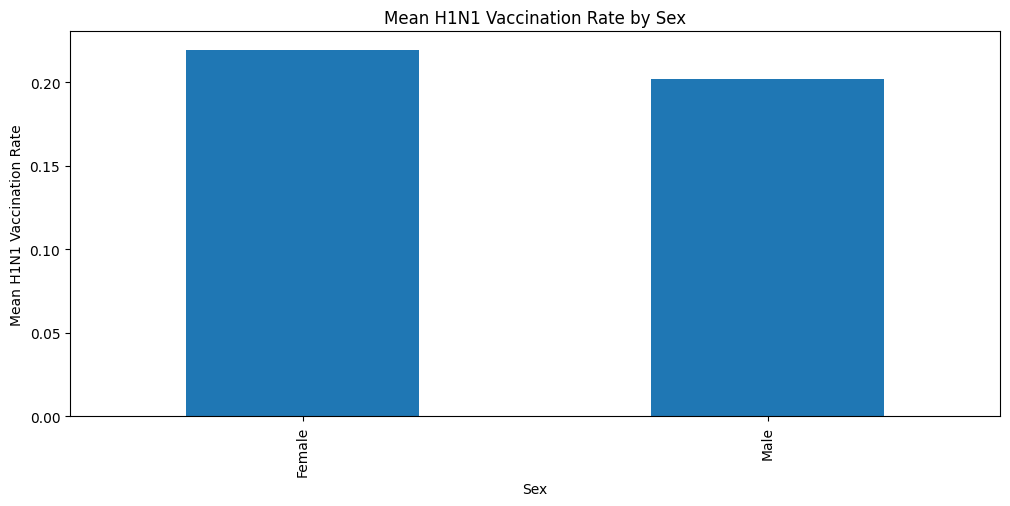

In [ ]:
fix, ax = plt.subplots(figsize=(12,5))
vaccines_circum.groupby("sex")['h1n1_vaccine'].mean().plot(kind='bar', ax=ax)
plt.xlabel('Sex') # Add x-axis label
plt.ylabel('Mean H1N1 Vaccination Rate') # Add y-axis label
plt.title('Mean H1N1 Vaccination Rate by Sex') # Add title
plt.show()

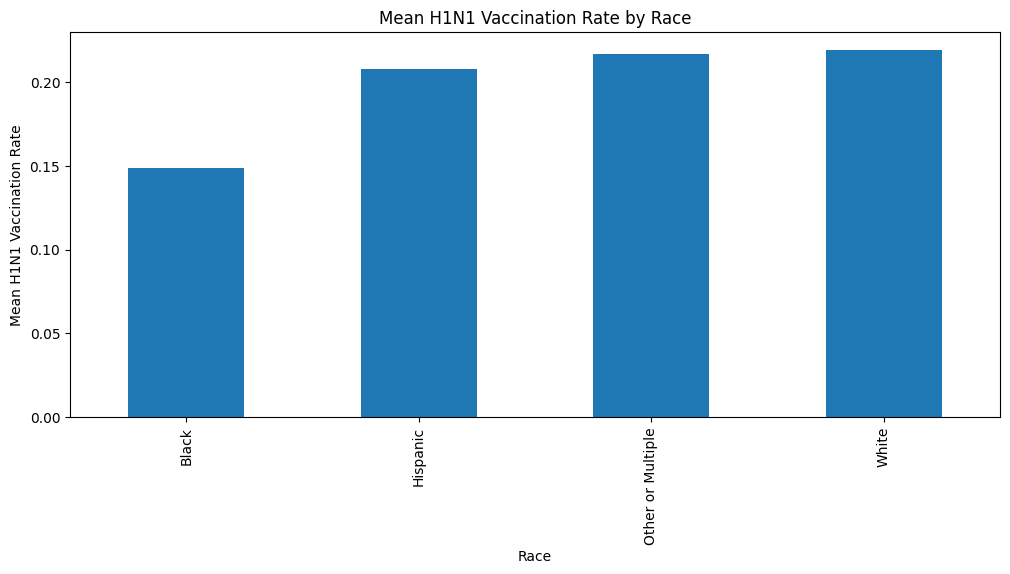

In [ ]:
fix, ax = plt.subplots(figsize=(12,5))
vaccines_circum.groupby("race")['h1n1_vaccine'].mean().plot(kind='bar', ax=ax)
plt.xlabel('Race') # Add x-axis label
plt.ylabel('Mean H1N1 Vaccination Rate') # Add y-axis label
plt.title('Mean H1N1 Vaccination Rate by Race') # Add title
plt.show()

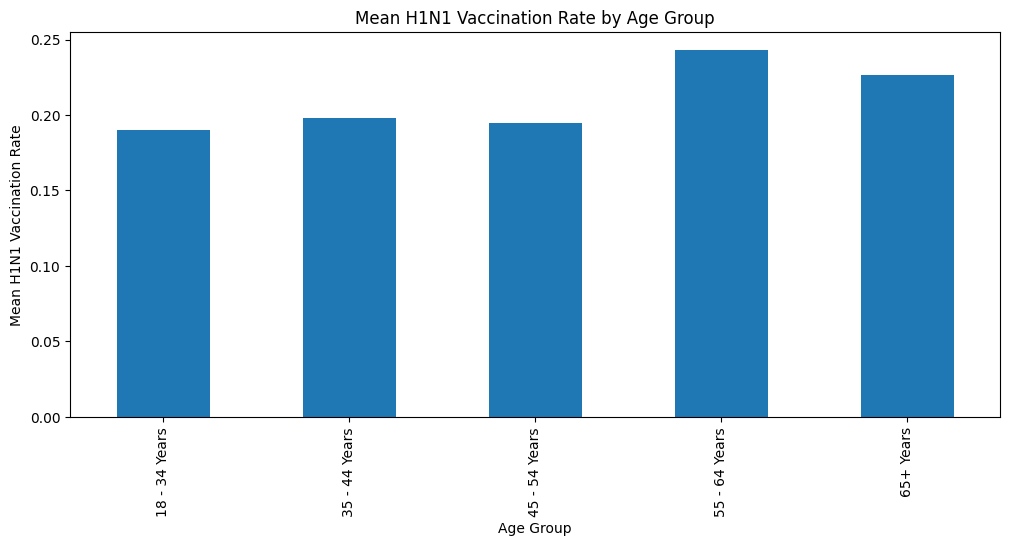

In [ ]:
fix, ax = plt.subplots(figsize=(12,5))
vaccines_circum.groupby("age_group")['h1n1_vaccine'].mean().plot(kind='bar', ax=ax)
plt.xlabel('Age Group') # Add x-axis label
plt.ylabel('Mean H1N1 Vaccination Rate') # Add y-axis label
plt.title('Mean H1N1 Vaccination Rate by Age Group') # Add title
plt.show()

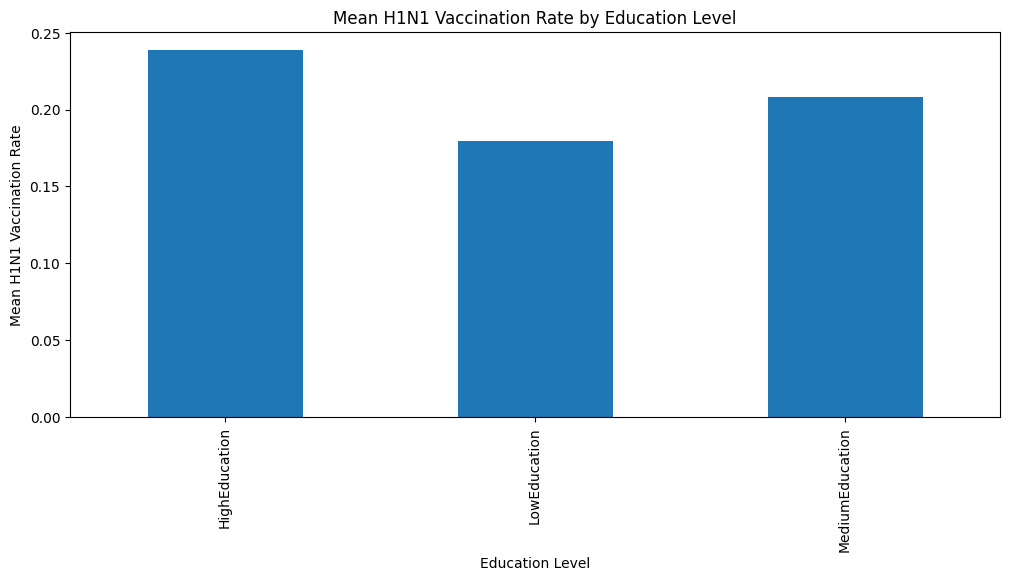

In [ ]:
fix, ax = plt.subplots(figsize=(12,5))
vaccines_circum.groupby("education")['h1n1_vaccine'].mean().plot(kind='bar', ax=ax)
plt.xlabel('Education Level') # Add x-axis label
plt.ylabel('Mean H1N1 Vaccination Rate') # Add y-axis label
plt.title('Mean H1N1 Vaccination Rate by Education Level') # Add title
plt.show()

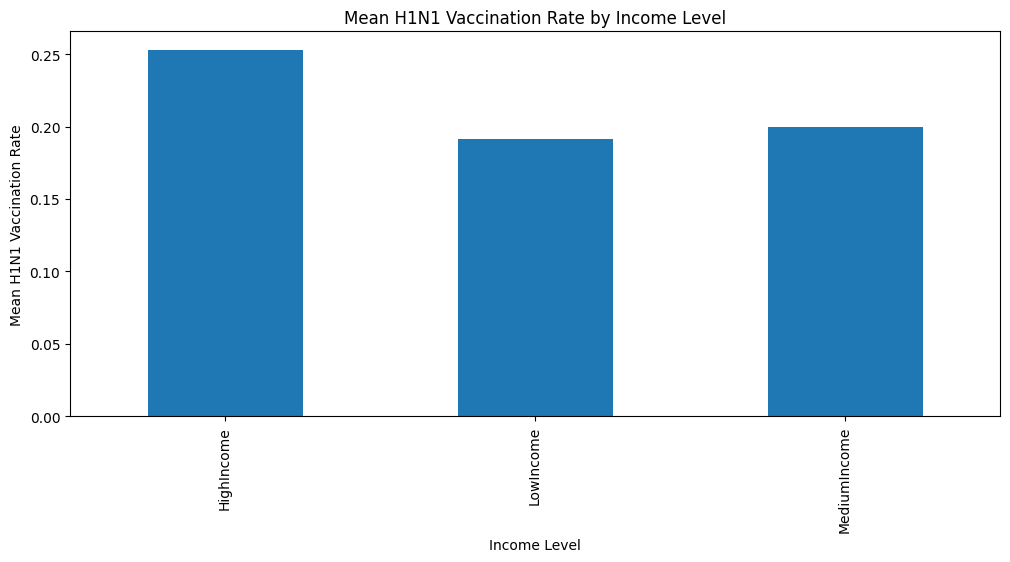

In [ ]:
fix, ax = plt.subplots(figsize=(12,5))
vaccines_circum.groupby("income_poverty")['h1n1_vaccine'].mean().plot(kind='bar', ax=ax)
plt.xlabel('Income Level') # Add x-axis label
plt.ylabel('Mean H1N1 Vaccination Rate') # Add y-axis label
plt.title('Mean H1N1 Vaccination Rate by Income Level') # Add title
plt.show()

In [ ]:
vaccines_circum = pd.get_dummies(vaccines_circum,columns=['age_group','education','income_poverty','sex','race'],drop_first=True,dtype=int)

In [ ]:
correlation_maxtrix_vaccine_effect = vaccines_circum.corr()['h1n1_vaccine']
print(correlation_maxtrix_vaccine_effect)

h1n1_vaccine                   1.000000
age_group_35 - 44 Years       -0.014733
age_group_45 - 54 Years       -0.021401
age_group_55 - 64 Years        0.038122
age_group_65+ Years            0.020377
education_LowEducation        -0.053183
education_MediumEducation     -0.006712
income_poverty_LowIncome      -0.017313
income_poverty_MediumIncome   -0.041907
sex_Male                      -0.020672
race_Hispanic                 -0.002902
race_Other or Multiple         0.002508
race_White                     0.030887
Name: h1n1_vaccine, dtype: float64


In [ ]:
correlation_maxtrix_vaccine_behavior = vaccines_behavior.corr()['h1n1_vaccine']
print(correlation_maxtrix_vaccine_behavior)

h1n1_vaccine                   1.000000
behavioral_antiviral_meds      0.040226
behavioral_avoidance           0.046837
behavioral_face_mask           0.070413
behavioral_wash_hands          0.074570
behavioral_large_gatherings    0.018089
behavioral_outside_home        0.022080
behavioral_touch_face          0.070855
Name: h1n1_vaccine, dtype: float64


In [ ]:
y = vaccines_circum['h1n1_vaccine']
X = vaccines_circum.drop('h1n1_vaccine', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
model = LogisticRegression(fit_intercept=False, C=1e12, solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5260
           1       0.00      0.00      0.00      1417

    accuracy                           0.79      6677
   macro avg       0.39      0.50      0.44      6677
weighted avg       0.62      0.79      0.69      6677



In [ ]:
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[5259    1]
 [1417    0]]


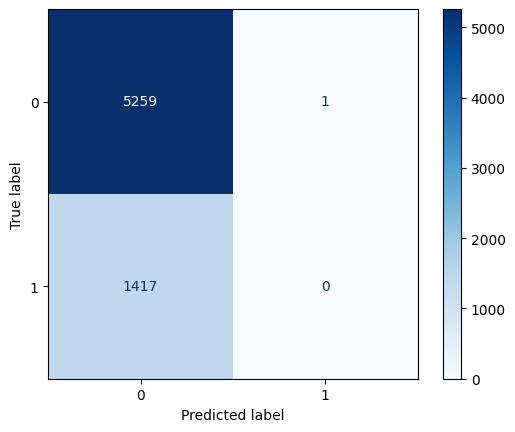

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
y_train.value_counts()

,count
h1n1_vaccine,
0,15773
1,4257


In [ ]:
yb = vaccines_behavior['h1n1_vaccine']
Xb = vaccines_behavior.drop('h1n1_vaccine', axis=1)

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, random_state=42)

In [ ]:
model.fit(Xb_train, yb_train)

yb_pred = model.predict(Xb_test)
accuracy = accuracy_score(yb_test, yb_pred)
print(classification_report(yb_test, yb_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5260
           1       0.19      0.00      0.01      1417

    accuracy                           0.79      6677
   macro avg       0.49      0.50      0.44      6677
weighted avg       0.66      0.79      0.69      6677



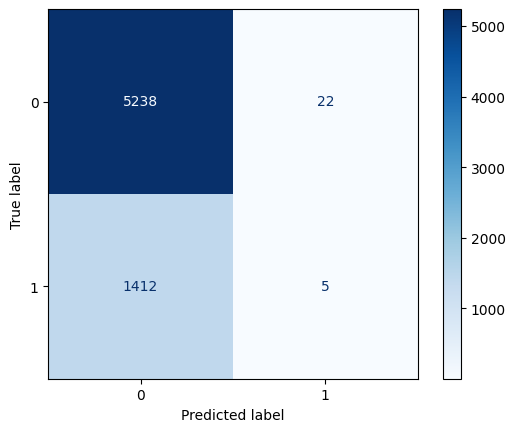

In [ ]:
cfb = confusion_matrix(yb_test, yb_pred)
dispb = ConfusionMatrixDisplay(confusion_matrix=cfb, display_labels=model.classes_)
dispb.plot(cmap='Blues')
plt.show()


In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

model = LogisticRegression(fit_intercept=False, C=1e12, solver='lbfgs')
model.fit(X_train_over, y_train_over)

y_pred_over = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_over)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_over))

Accuracy: 0.5655234386700614
              precision    recall  f1-score   support

           0       0.82      0.58      0.68      5260
           1       0.25      0.52      0.34      1417

    accuracy                           0.57      6677
   macro avg       0.53      0.55      0.51      6677
weighted avg       0.70      0.57      0.60      6677



In [ ]:
cf_over = confusion_matrix(y_test, y_pred_over)
print(cf_over)

[[3039 2221]
 [ 680  737]]


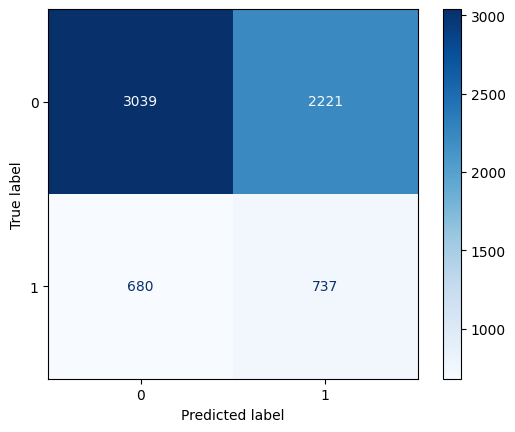

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_over, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

AUC for None: 0.5436227932948902
-------------------------------------------------------------------------------------
AUC for Balanced: 0.571434455592198
-------------------------------------------------------------------------------------
AUC for 2 to 1: 0.5577143110142727
-------------------------------------------------------------------------------------
AUC for 10 to 1: 0.5653572453987565
-------------------------------------------------------------------------------------
AUC for 100 to 1: 0.5055964912751463
-------------------------------------------------------------------------------------
AUC for 1000 to 1: 0.4861896954686573
-------------------------------------------------------------------------------------


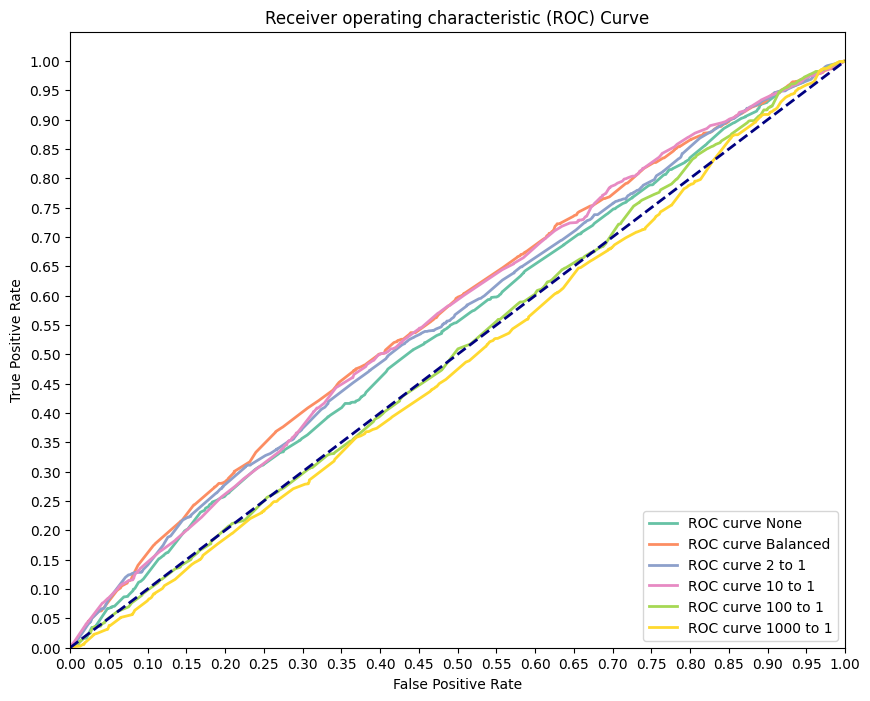

In [ ]:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, weight in enumerate(weights):
    model = LogisticRegression(fit_intercept=False, C=1e20, class_weight=weight, solver='lbfgs')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    y_score = model.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

AUC for 0.40: 0.5509084420306383
-------------------------------------------------------------------------------------
AUC for 0.60: 0.5589541445403586
-------------------------------------------------------------------------------------
AUC for 0.80: 0.5672840119032605
-------------------------------------------------------------------------------------
AUC for even: 0.5708056167504314
-------------------------------------------------------------------------------------


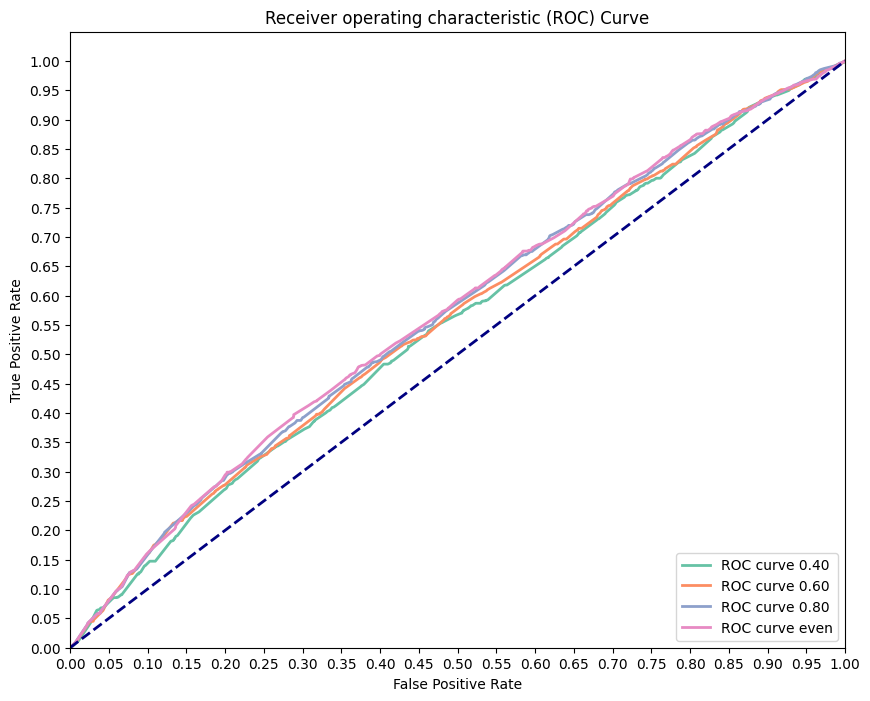

In [ ]:
ratios = [0.40, 0.60, 0.80, 1]
names = ['0.40', '0.60','0.80','even']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, ratio in enumerate(ratios):
    smote = SMOTE(sampling_strategy=ratio)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    model = LogisticRegression(fit_intercept=False, C=1e20, solver ='lbfgs')
    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test)

    y_score = model.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()